In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#def extract_fft_from_file(file_adress)

signals = pd.read_csv('mafaulda/horizontal-misalignment/0.5mm/12.288.csv', header=None, 
	names=['ac1rad','ac1ax','ac1tg','ac2rad','ac2ax','ac2tg','tachometer','microphone'])

signals.shape

(250000, 8)

In [44]:
sampling_freq = 50000

# reduz o samplig frequency de 50kHz para 5kHz, tomando apenas 1 a cada 10 sinais
ratio = 10
reducted_signal = signals.iloc[[ratio*i for i in range(round(250000/ratio))],:]

reducted_signal.shape

(25000, 8)

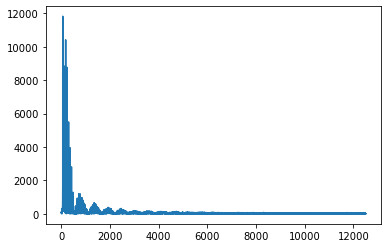

(12501,)


In [45]:
complex_fft = np.fft.rfft(reducted_signal['ac1rad'])
real_fft = np.abs(complex_fft)

plt.plot(real_fft)
plt.show()
print(fft.shape)

Notamos que o eixo x exibe o índice de cada valor. Para fornecer o eixo em frequência, consideramos que  para 5kHz a frequência de Nyquist é 5/2 = 2.5 kHz

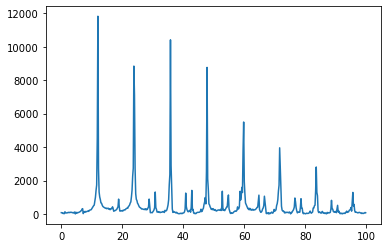

In [41]:
freq_axis = np.linspace(0,2500, 12501)

max_freq = 100
plt.plot(freq_axis[:max_freq*5], real_fft[:max_freq*5])
plt.show()

In [46]:
freq_axis[real_fft.argmax()] #frequencia fundamental

12.0

In [68]:
# encontrando os 20 maiores valores de amplitude
temp = np.argpartition(-real_fft, 20)
biggest_args = temp[:20]

greatest_values = pd.DataFrame({'freq':freq_axis[biggest_args], 
                                'value':real_fft[biggest_args]})
greatest_values.sort_values('value', ascending=False, ignore_index=True, inplace=True)
greatest_values

,freq,value
0,12.0,11820.582701
1,35.8,10409.239115
2,23.8,8842.121568
3,47.8,8762.920242
4,24.0,7100.563212
5,59.8,5499.889268
6,11.8,4555.981990
7,71.6,3958.735456
8,59.6,3764.457163
9,36.0,2890.374062


In [84]:
greatest_values['fundamental_multiple'] = greatest_values['freq']/greatest_values.iloc[0,0]

In [88]:
pd.options.display.float_format = '{:,.2f}'.format
greatest_values.sort_values('freq')

,freq,value,fundamental_multiple
6,11.80,"4,555.98",0.98
0,12.00,"11,820.58",1.00
14,12.20,"2,717.56",1.02
17,23.40,"2,253.59",1.95
12,23.60,"2,740.32",1.97
2,23.80,"8,842.12",1.98
4,24.00,"7,100.56",2.00
13,24.20,"2,720.85",2.02
16,35.60,"2,368.10",2.97
1,35.80,"10,409.24",2.98
